# Credentials

# Part 1 - Web Scraping

Explain your project idea:

In the summer of 2022, the US economy has experienced 2 consecutives quarters of negative GDP growth. According to the definition of a recession, generally 2 negative quarters in GDP usually means the US economy is in a recession. However, with employment and consumer staying strong, many economists do not believe we are in a recession.

This project aims to do a deep dive in the US economy.

We will look at:
1) Real GDP = measures the value of finish good/services at a base year price

2) S&P 500 = top 500 companies in the US economy

2) Nonfarm Payrolls = measures the net amount of new workers excluding farm workers

3) Unemployment Rate = measures the percentage of unemployed workers in the labor force

4) Core CPI = measures the changes in price over time excluding food and energy

5) Consumer Sentiment = measures how consumers feel about the general economy

6) Federal Funds Rate = the rate banks lend to eachother

7) US 10 year yield = the interest rate for a ten year treasury

8) US 2 year minus 10 yield = the difference between 2 and 10 year treasuries

to try and understand what is going on in the economy. We will also discuss the world economy and its affect on the US economy.


# Install FRED API and Use my API Key

In [266]:
# The first step of my economic analysis is to install the fred api on python
#!pip install fredapi

In [267]:
# We import Fred from the fredapi. This helps us get data straight from the 'https://fred.stlouisfed.org/' website
from fredapi import Fred

# Importing Libraries
import pandas as pd
import numpy as np

In [268]:
# Inorder to websrape from the FRED website, I requested an API key. Below is the key I recieved the key.
# I named the FRED API key as 'super_secret_key'
super_secret_key = '9ab9ae52f27e006f9acc6d210f76105a'

# Creating the FRED object

In [269]:
# 1. Create Fred Object to get access of the website. I inserted my API key
fred = Fred(api_key = super_secret_key)

# Searching in FRED using 'fred.search'

In [270]:
# 2. Searching in FRED
# I will be able to do a quick search of all the data FRED has.
# I looked up the s&p 500 with FRED
s_sp500 = fred.search('s&p 500')
s_sp500.shape # tells the shape of the results

(153, 15)

In [271]:
s_sp500.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2024-09-30,2024-09-30,S&P 500,2014-09-29,2024-09-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-09-27 19:16:31-05:00,83,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2024-09-30,2024-09-30,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2024-09-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-09-30 08:36:09-05:00,54,"Copyright, 2016, Chicago Board Options Exchang..."
MEHOINUSA672N,MEHOINUSA672N,2024-09-30,2024-09-30,Real Median Household Income in the United States,1984-01-01,2023-01-01,Annual,A,2023 CPI-U-RS Adjusted Dollars,2023 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:01-05:00,83,Household data are collected as of March. As ...
MEHOINUSA646N,MEHOINUSA646N,2024-09-30,2024-09-30,Median Household Income in the United States,1984-01-01,2023-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:03-05:00,72,Household data are collected as of March. As ...
STLFSI,STLFSI,2024-09-30,2024-09-30,St. Louis Fed Financial Stress Index (DISCONTI...,1993-12-31,2020-03-13,"Weekly, Ending Friday",W,Index,Index,Not Seasonally Adjusted,NSA,2020-03-19 09:00:02-05:00,32,The methodology for the St. Louis Fed's Financ...


# Getting Data using 'fred.get_series'

In [272]:
# 3 Getting Data
# I want to get the information from the first row.

# So im going to use series id SP500
sp500 = fred.get_series(series_id = 'SP500', observation_start = '01/01/2019', name = 'S&P 500')

#remove NaN values
sp500 = sp500.dropna()
sp500.head()

2019-01-02    2510.03
2019-01-03    2447.89
2019-01-04    2531.94
2019-01-07    2549.69
2019-01-08    2574.41
dtype: float64

In [273]:
np.shape(sp500)

(1445,)

In [274]:
sp500.min()

2237.4

<h5>Getting all the data</h5>

In [275]:
series_data_monthly = {
    "Non_Farm_Payroll": 'PAYEMS',
    "Unemployement_Rate": 'UNRATE',
    "Core_CPI": 'CORESTICKM159SFRBATL',
    "Consumer_Sentiment":'UMCSENT',
    "Federal_Funds_Rate":'FEDFUNDS',
    "US_2Y_10Y_Spread": 'T10Y2YM'
}

series_data_quarterly = {
    "Real_GDP": 'GDPC1',
}

series_data_daily = {
    "SP500":'SP500',
    "US_10_YYM":'DGS10'
}

In [276]:
for series_name, series_id in series_data_daily.items():
  series_data_daily[series_name] = fred.get_series(series_id = series_id, observation_start = '01/01/2019')

for series_name, series_id in series_data_quarterly.items():
  series_data_quarterly[series_name] = fred.get_series(series_id = series_id, observation_start = '01/01/2019')

for series_name, series_id in series_data_monthly.items():
  series_data_monthly[series_name] = fred.get_series(series_id = series_id, observation_start = '01/01/2019')

In [277]:
df_daily = pd.DataFrame(series_data_daily).reset_index()
df_monthly = pd.DataFrame(series_data_monthly).reset_index()
df_quarterly = pd.DataFrame(series_data_quarterly).reset_index()

In [290]:
df_monthly["Non_Farm_Payroll_%"] = df_monthly["Non_Farm_Payroll"].diff()*1000
df_monthly

,index,Non_Farm_Payroll,Unemployement_Rate,Core_CPI,Consumer_Sentiment,Federal_Funds_Rate,US_2Y_10Y_Spread,Non_Farm_Payroll_%
0,2019-01-01,150062.0,4.0,2.375054,91.2,2.40,0.17,NaN
1,2019-02-01,150067.0,3.8,2.375943,93.8,2.40,0.18,5000.0
2,2019-03-01,150294.0,3.8,2.356946,98.4,2.41,0.16,227000.0
3,2019-04-01,150602.0,3.7,2.392773,97.2,2.42,0.19,308000.0
4,2019-05-01,150640.0,3.6,2.360903,100.0,2.39,0.19,38000.0
...,...,...,...,...,...,...,...,...
63,2024-04-01,158214.0,3.9,4.412395,77.2,5.33,-0.33,108000.0
64,2024-05-01,158430.0,4.0,4.302023,69.1,5.33,-0.38,216000.0
65,2024-06-01,158548.0,4.1,4.226876,68.2,5.33,-0.43,118000.0
66,2024-07-01,158637.0,4.3,4.164951,66.4,5.33,-0.25,89000.0


# Data Aggregation & Data Visualization

# Plotting Graphs

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
#all our datasets we gathered. We will plot them all.

# sp500
# RGDP
# nonfarm
# unrate
# Core_CPI
# consumersentiment
# ffr
# US10Y
# yr2_10

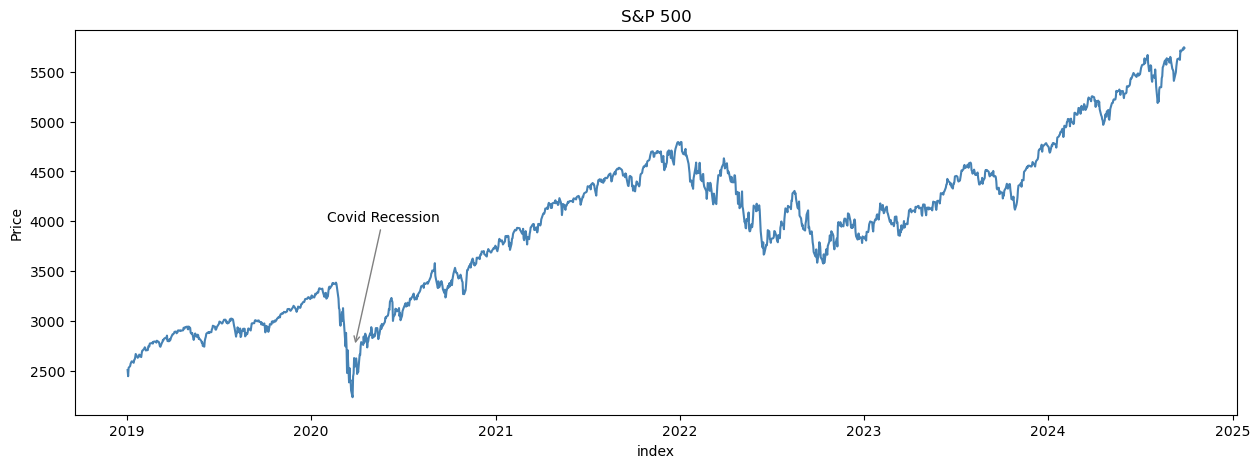

In [281]:
#Plotting SP500
#plt.figure(figsize = (15,5))
#plt.plot(sp500)
#plt.xlabel('Date')
#plt.ylabel('Price')
#plt.title('SP500')
#plt.show()

fig, ax = plt.subplots(figsize = (15,5))
sns.lineplot(data = df_daily, x = "index", y = "SP500", color = "steelblue")
plt.title("S&P 500")
plt.ylabel("Price")
#ax.annotate("Covid Recession", xy, )
ax.annotate('Covid Recession', xy = (pd.Timestamp("2020-03-27"),2750),
            xytext  = (pd.Timestamp("2020-02-01"), 4000),
            arrowprops = {"arrowstyle":"->",
            "color":"gray"})

plt.show()

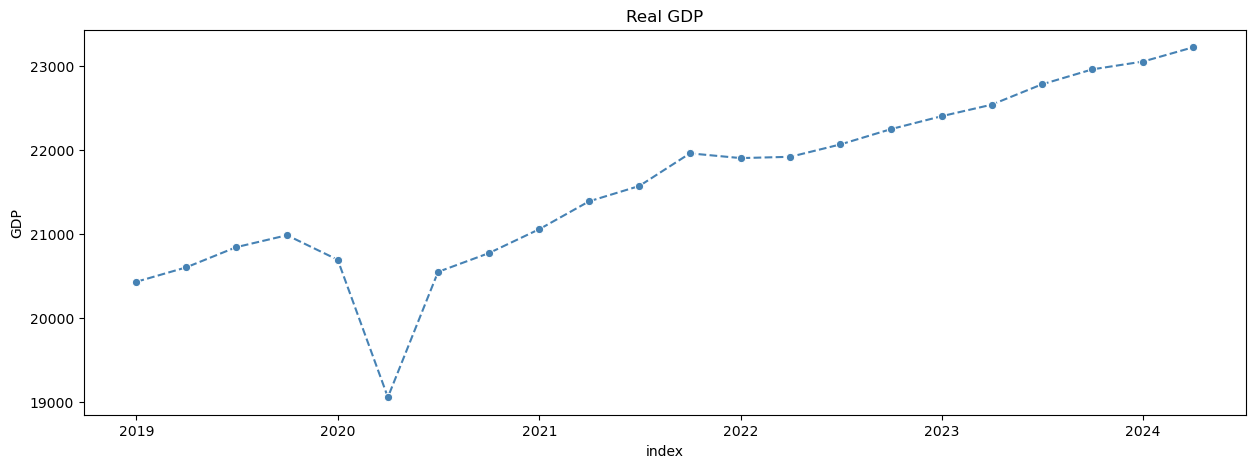

In [282]:
#PLotting Real GDP
plt.figure(figsize = (15,5))
sns.lineplot(data = df_quarterly, x = "index", y = "Real_GDP", marker = "o" , linestyle= "--", color = "steelblue")
plt.ylabel('GDP')
plt.title('Real GDP')
plt.show()

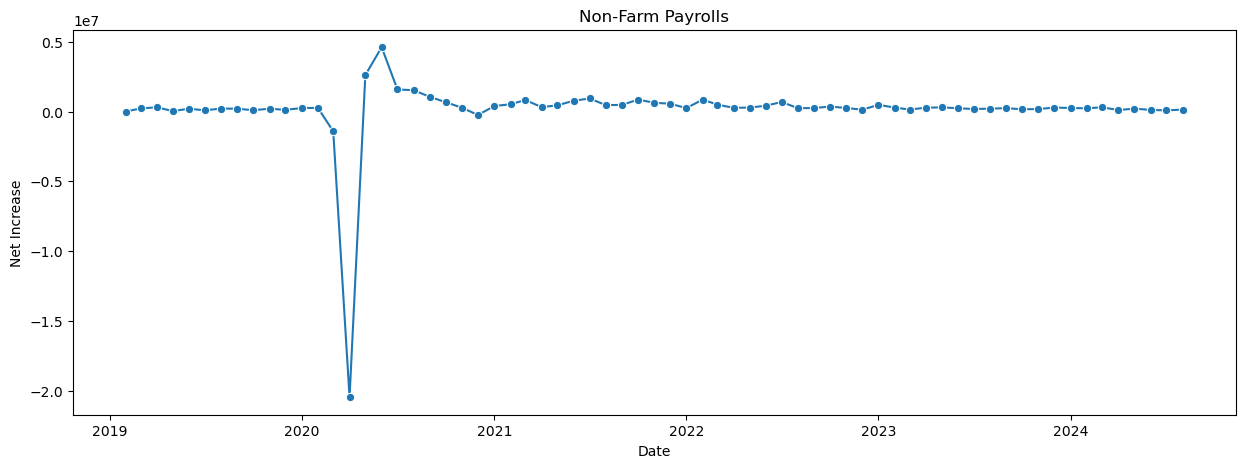

In [309]:
#PLotting Non-Farm Payrolls
plt.figure(figsize = (15,5))
sns.lineplot(data = df_monthly, x = "index", y = "Non_Farm_Payroll_%", marker = "o")
plt.xlabel('Date')
plt.ylabel('Net Increase')
plt.title('Non-Farm Payrolls')
plt.show()

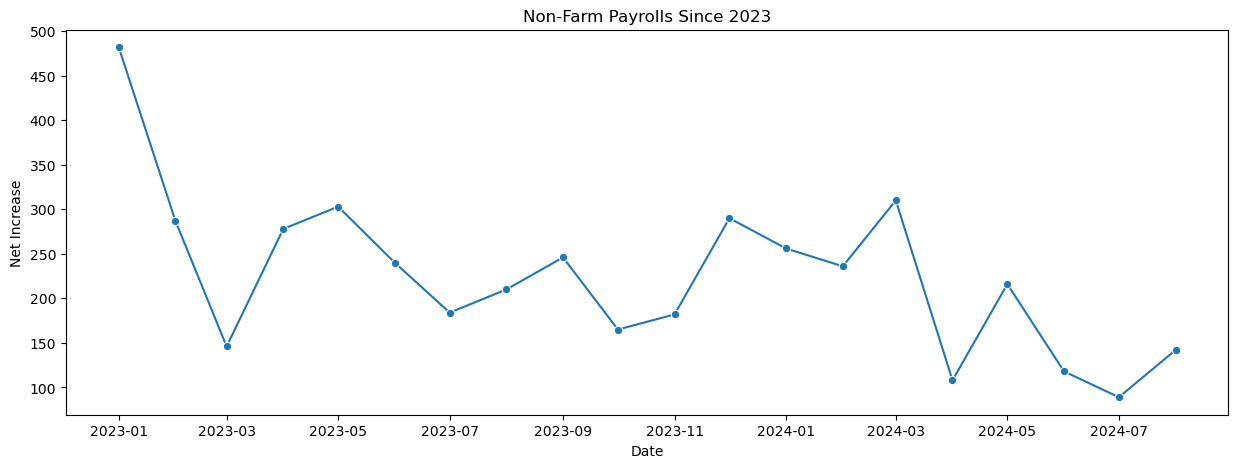

In [298]:
#units are hard to see because of the 20 million jobs lost during the pandemic
#I will look at data from 2021 forward to get a better look at the non-farm payrolls
nonfarm2 = fred.get_series(series_id = 'PAYEMS', observation_start = '01/01/2023', units = 'chg')

#Plotting new non-farm data set
plt.figure(figsize = (15,5))
sns.lineplot(data = nonfarm2, marker = "o")
plt.xlabel('Date')
plt.ylabel('Net Increase')
plt.title('Non-Farm Payrolls Since 2023')
plt.show()

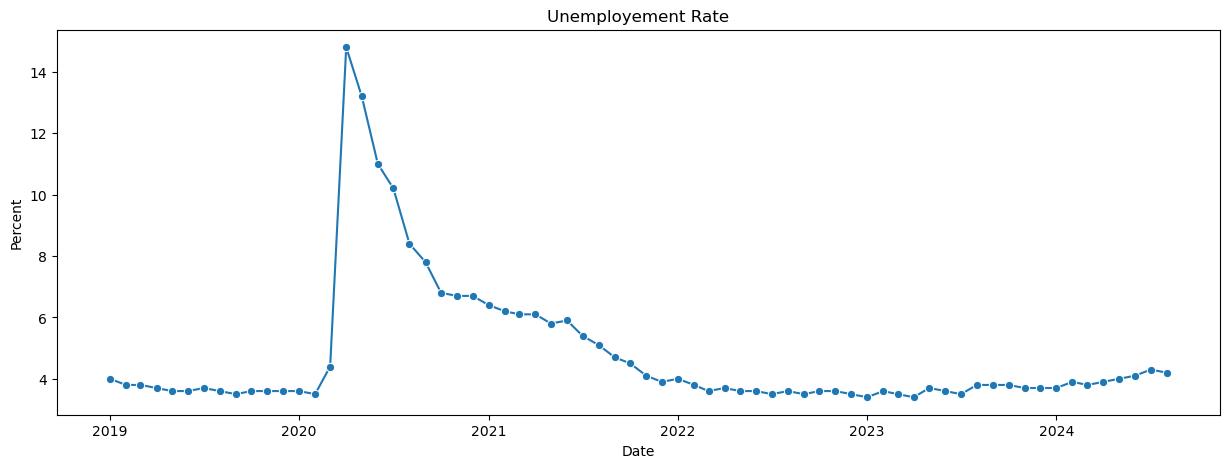

In [303]:
#Plotting Unemployement Rate
plt.figure(figsize = (15,5))
sns.lineplot(data = df_monthly, x = "index", y = "Unemployement_Rate", marker = "o")
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Unemployement Rate')
plt.show()

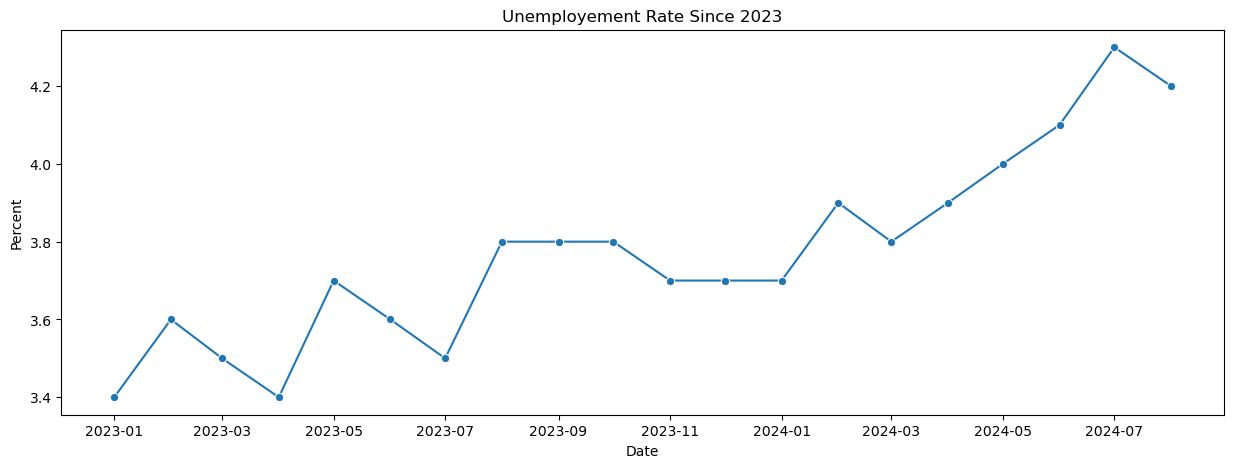

In [301]:
# again theunemployement rate of 14% makes the other data points look small.
# I will look at the unemployement rate from 2021 onward to get a better look at the data
unrate2 = fred.get_series(series_id = 'UNRATE', observation_start = '01/01/2023')

#plotting the new unemployement rate
plt.figure(figsize = (15,5))
sns.lineplot(data = unrate2, marker = "o")
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Unemployement Rate Since 2023')
plt.show()

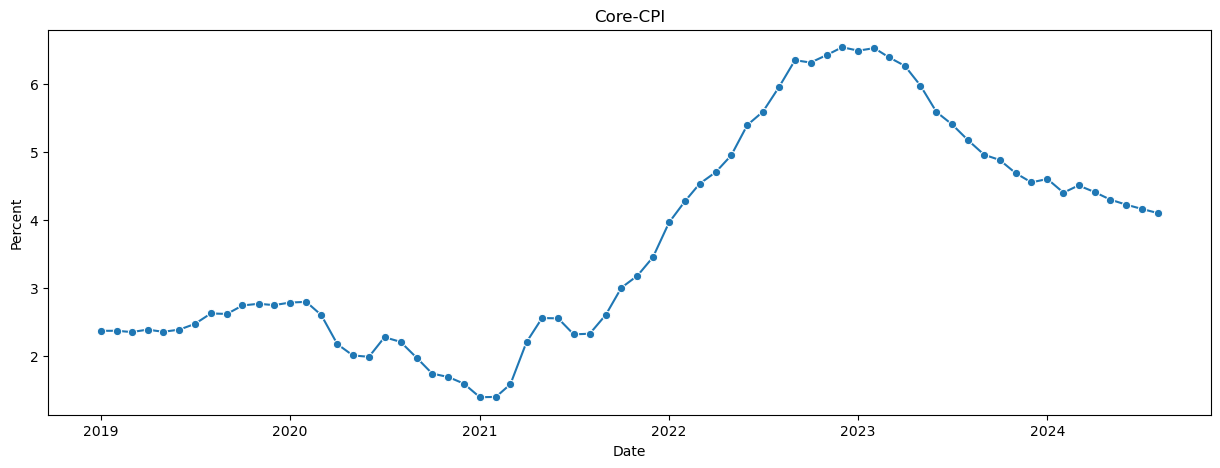

In [304]:
#Plotting Core CPI
plt.figure(figsize = (15,5))
sns.lineplot(data = df_monthly, x = 'index', y = "Core_CPI", marker = "o")
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Core-CPI')
plt.show()

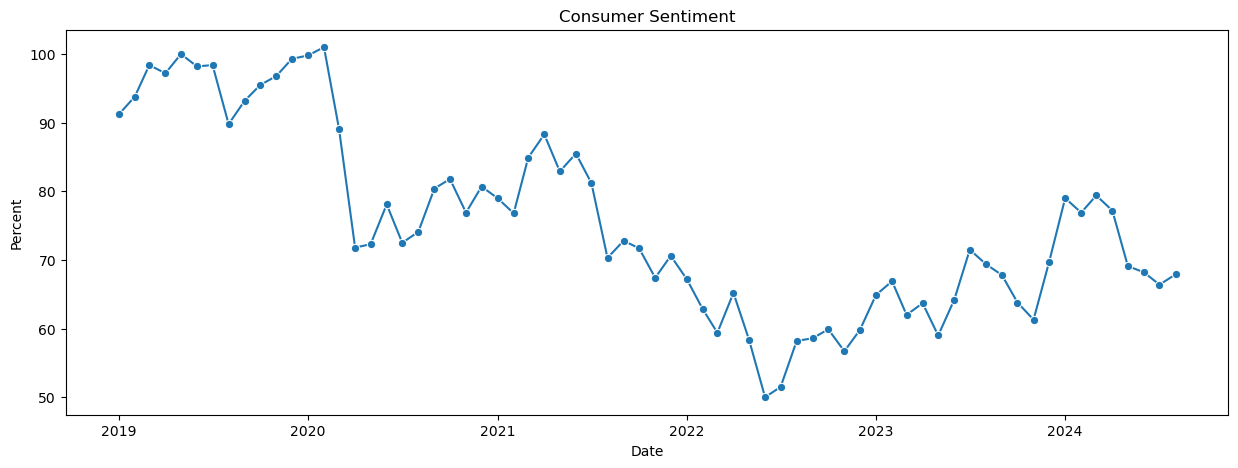

In [308]:
#Plotting Consumer Sentiment
plt.figure(figsize = (15,5))
sns.lineplot(data = df_monthly, x = 'index', y = "Consumer_Sentiment", marker = "o")
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Consumer Sentiment')
plt.show()

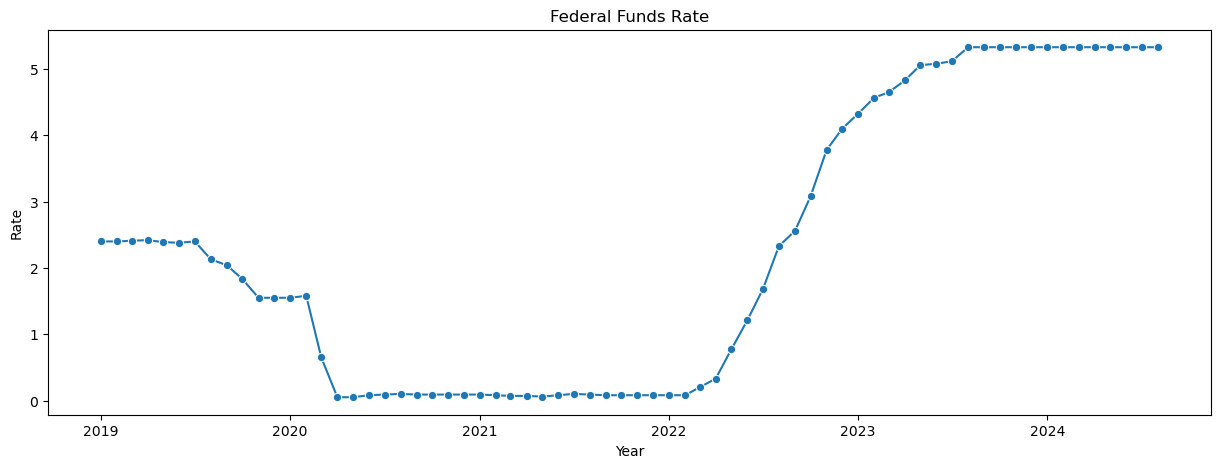

In [313]:
#Plotting Federeal Funds Rate
plt.figure(figsize = (15,5))
sns.lineplot(data = df_monthly, x = "index", y = "Federal_Funds_Rate", marker = "o")
plt.xlabel("Year")
plt.ylabel('Rate')
plt.title('Federal Funds Rate')
plt.show()

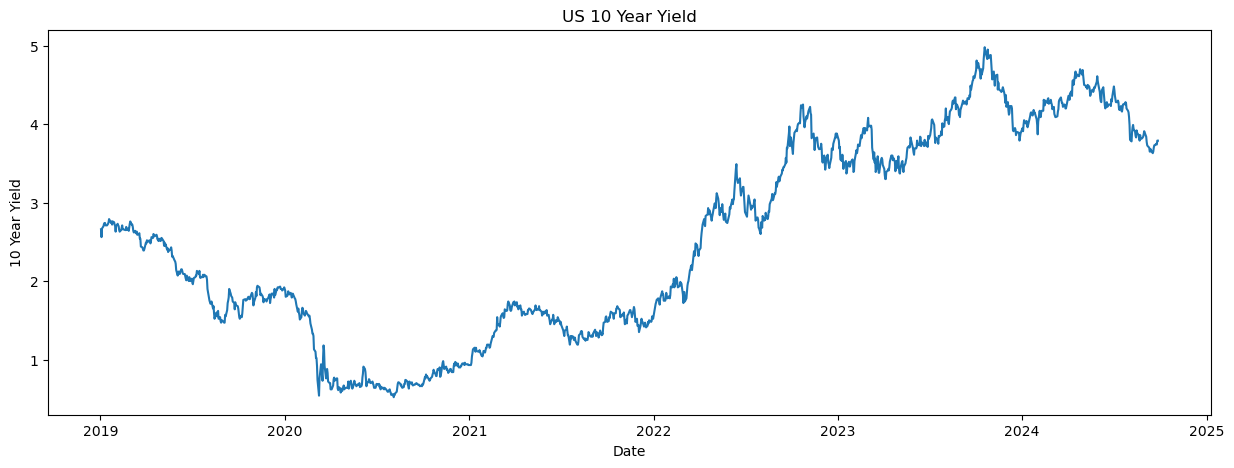

In [317]:
#Plotting Us 10 year yield
plt.figure(figsize = (15,5))
sns.lineplot(data = df_daily, x = "index", y = "US_10_YYM")
plt.xlabel('Date')
plt.ylabel('10 Year Yield')
plt.title('US 10 Year Yield')
plt.show()

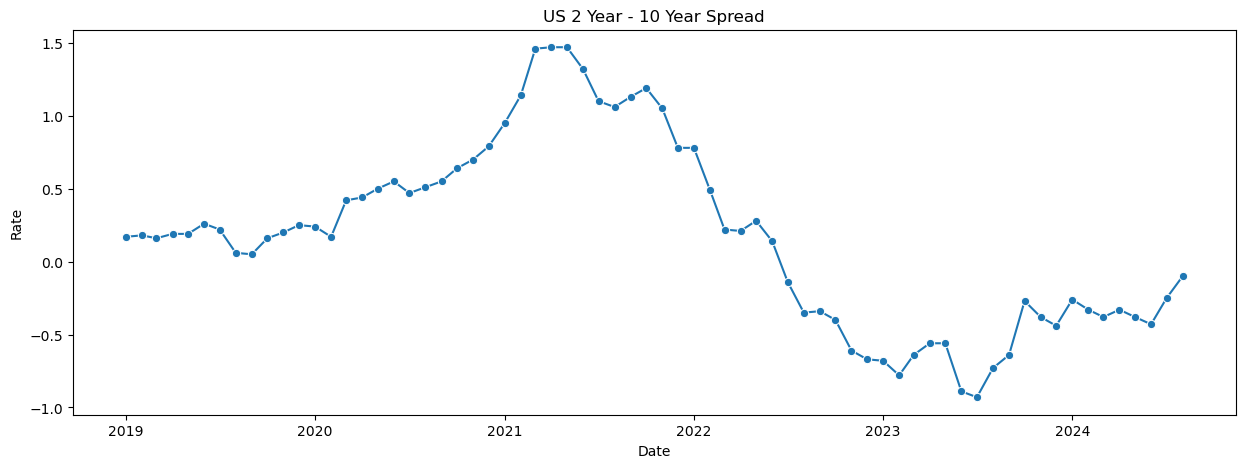

In [324]:
#Plotting US 2/10 year spread
plt.figure(figsize = (15,5))
sns.lineplot(data = df_monthly, x = "index", y = 'US_2Y_10Y_Spread' , marker = "o")
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('US 2 Year - 10 Year Spread')
plt.show()

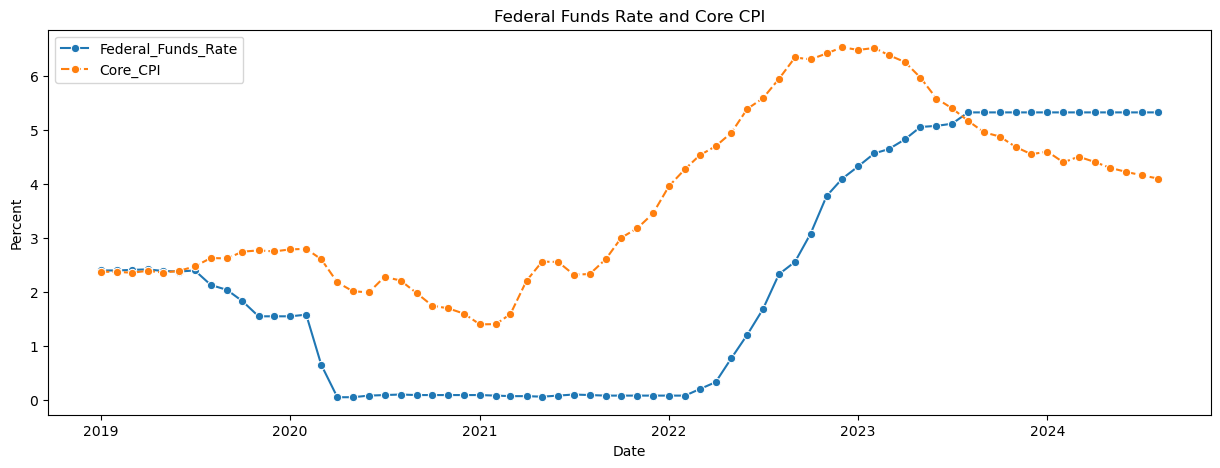

In [348]:
# Comparing Federal Funds Rate, and Core CPI

df_monthly_2 = df_monthly[['index','Federal_Funds_Rate', "Core_CPI"]]
df_monthly_2 = df_monthly_2.set_index('index')

plt.figure(figsize = (15,5))
sns.lineplot(data = df_monthly_2, marker = "o")
plt.legend(loc = "upper left")
plt.title("Federal Funds Rate and Core CPI")
plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()

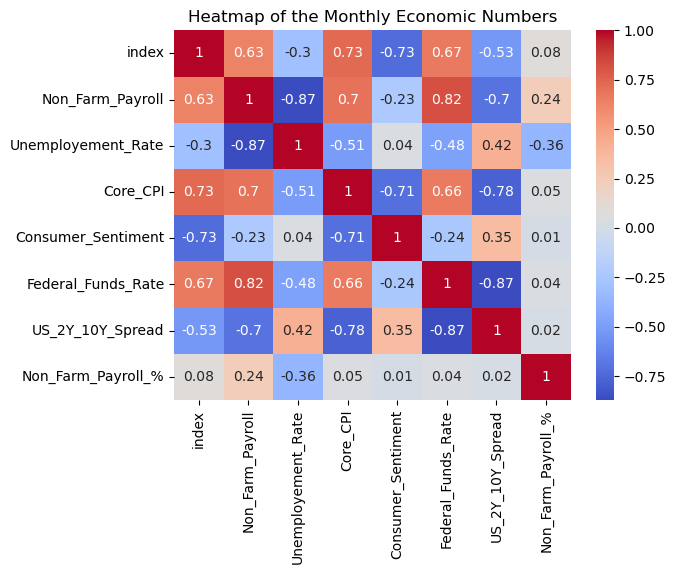

In [357]:
month_corr = round(df_monthly.corr(),2)

sns.heatmap(month_corr, cmap= "coolwarm", annot = True)
plt.title("Heatmap of the Monthly Economic Numbers")
plt.show()

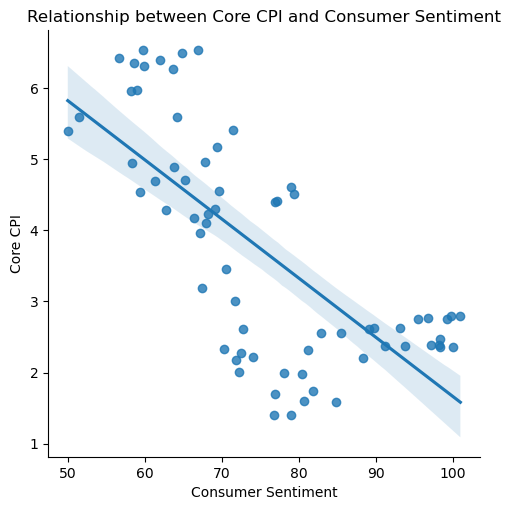

In [359]:
df_2 = df_monthly[['Consumer_Sentiment', "Core_CPI"]]

sns.lmplot(data = df_2, x = "Consumer_Sentiment", y = "Core_CPI", )
plt.title("Relationship between Core CPI and Consumer Sentiment")
plt.xlabel("Consumer Sentiment")
plt.ylabel("Core CPI")
plt.show()

References
https://www.datasciencelearner.com/pandas-dropna-remove-nan-rows-python/#:~:text=Steps%20to%20Remove%20NaN%20from%20Dataframe%20using%20pandas,Remove%20the%20NaN%20values%20using%20dropna%20%28%29%20method


https://www.youtube.com/watch?v=R67XuYc9NQ4&t=2097s